# Introduction
In this assignment simulations have been carried out by solving the circuits symbolically. We just have to feed in a matrix and we can can simulate the circuit.In this assignment a Highpass and a Lowpass circuit has been simulated.

# Import Libraries

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

# Lowpass filter
In the circuit given below we write the nodal equations and form a matrix.

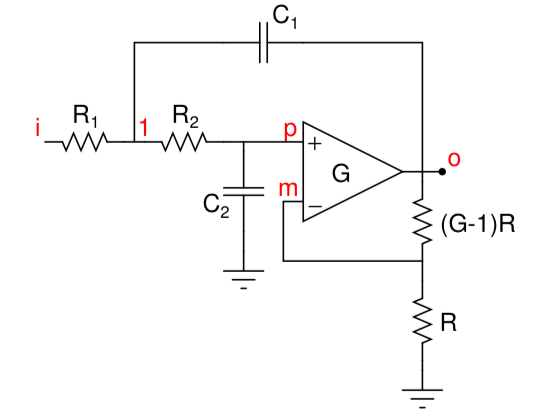

In [2]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/lowpass.png')

The circuit equations are:<br/>
$V_m=\frac{V_m}{G_1}$<br/>
$V_p=V1\frac{1}{1+j\omega R_2.C_2}$<br/>
$V_0=G_2(V_p-V_m)$<br/>
$\frac{V_i-V_1}{R1}+\frac{V_p-V_1}{R2}+j\omega C1(V_0-V_1)=0$<br/>
Therefore the matrix becomes:<br/>
$\begin{pmatrix}
    0 & 0 & 1 & -\frac{1}{G_1}  \\
    -\frac{1}{1+sC_2R_2} & 1 & 0 & 0 \\
    0 & -G_2 & G_2 & 1\\
    -\frac{1}{R_1}-\frac{1}{R_2}-sC_1 & \frac{1}{R_2} & 0 & sC_1
  \end{pmatrix}
  .
  \begin{pmatrix}
  V_1\\
  V_p\\
  V_m\\
  V_0
  \end{pmatrix}
=
\begin{pmatrix}
    0\\
    0\\
    0\\
    V_i(s)/R_1
  \end{pmatrix}$
<br/>
<br/>
* Assuming $G_2$ is the gain of the opamp 
* Image courtesy:The Art of Electronics by Paul Horowitz and Winfield Hill

In [3]:
s=symbols('s')
def lowpass(R1,R2,C1,C2,G_1,G_2,Vi):
    s=symbols('s')
    A=Matrix([[0,0,1,-1/G_1],[-1/(1+s*R2*C2),1,0,0],[0,-G_2,G_2,1],[-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
    b=Matrix([[0],[0],[0],[-Vi/R1]])
    V=A.inv()*b
    return A,b,V

A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1000,1)
V0=V[3]

In [4]:
def plot(V0,upperlimit,title):
    '''
    Plots the transfer function of V0
    upperlimit=maximum omega
    title= title for the plot
    '''
    w=np.logspace(0,upperlimit,upperlimit*10+1)
    ss=1j*w
    s=symbols('s')
    hf=lambdify(s,V0,'numpy')
    v=hf(ss)
    plt.loglog(w,abs(v),lw=2)
    plt.xlabel('$\omega$')
    plt.ylabel('$|H(e^{j \omega})|$')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot of transfer function of lowpass filter
This filter has a cutoff at $\omega=10^5$.
After this it falls at 20dB/dec.

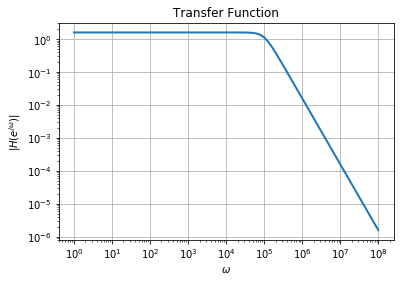

In [5]:
plot(V0,8,'Transfer Function')

In [6]:
def plot_graph(V0,t,V_i,V_i_name):
    '''
    Plots the time response
    V0=transfer function
    t=time array
    V_i=input voltge
    V_i_name= name of input voltage to be shown in the graph
    '''
    expr_num, expr_den = V0.as_numer_denom()
    Hnum = Poly(expr_num).coeffs()
    Hden = (Poly(expr_den)).coeffs()
    transferX = sp.lti(np.array(Hnum, dtype=float), np.array(Hden, dtype=float))
    t,x,svec = sp.lsim(transferX,V_i,t)
    plt.plot(t,x)
    plt.title('Response to input %s'%V_i_name)
    plt.xlabel('$t$')
    plt.ylabel('$V_0(t)$')
    plt.grid()
    plt.show()

The Laplace transform of the unit response for the lowpass filter falls initially at 20dB/dec till $\omega=10^5$ and then it falls at 40 dB/dec

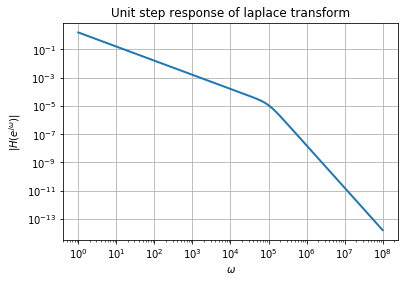

In [7]:
V_i=1/s
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1000,V_i)
V0=V[3]
plot(V0,8,'Unit step response of laplace transform')

The unit response of the lowpass filter reaches it's steady state after a small overshoot.This overshoot is because of the quality factor being greater than $\frac{1}{\sqrt{2}}$ in the second oreder system. 

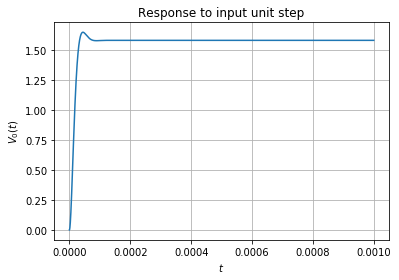

In [8]:
t=np.arange(0,1e-3,1e-8)
V_i = np.ones(t.size) #unit step
plot_graph(V0,t,V_i,'unit step')

# Sinusoidal input voltage
$V_i(t)=(sin(2000\pi t)+cos(2*10^6\pi t))u_0{t}$<br/>
In the input we have to frequency components:$10^3$ and $10^6$.<br/>
This causes the system to respond to the $10^3$ component and $10^6$ component but the second component is attenuated heavily.

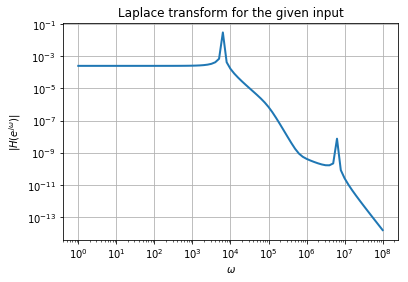

In [9]:
s=symbols('s')
w_0=2000*np.pi
sin_s=w_0/((s**2+w_0**2))
w_0=2*pi*1e6
cos_s=s/((s**2+w_0**2))
V_i=cos_s+sin_s
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1000,V_i)
V0=V[3]
plot(V0,8,'Laplace transform for the given input')

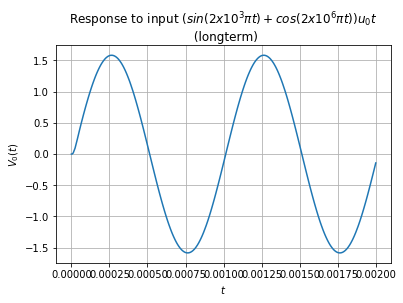

In [10]:
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1000,1)
V0=V[3]
t=np.arange(0,2*1e-3,1e-7)
u = np.ones(t.size)
V_i=(np.sin(2000*np.pi*t)+np.cos(2*1e6*np.pi*t))*u
plot_graph(V0,t,V_i,'$(sin(2x10^3\pi t)+cos(2x10^6\pi t))u_0{t}$ \n (longterm)')

The small ripples in th transient correspond to the frequency component with $\omega=10^6$

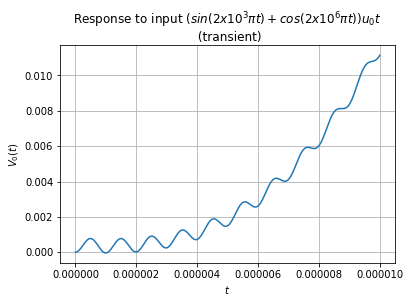

In [11]:
t=np.arange(0,1e-5,1e-8)
u = np.ones(t.size)
V_i=(np.sin(2000*np.pi*t)+np.cos(2*1e6*np.pi*t))*u
plot_graph(V0,t,V_i,'$(sin(2x10^3\pi t)+cos(2x10^6\pi t))u_0{t}$ \n (transient)')

# Highpass Filter
In the circuit given below we write the nodal equations and form a matrix.

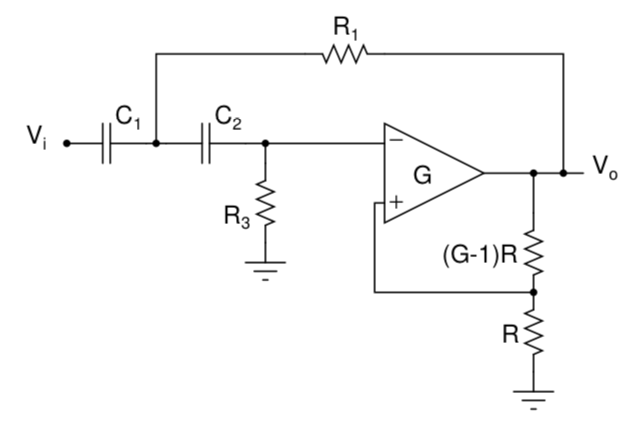

In [12]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/highpass.png')

The circuit equations are:<br/>
$V_m=\frac{V_m}{G_1}$<br/>
$V_p=V1\frac{1}{1+j\omega R_2.C_2}$<br/>
$V_0=G_2(V_p-V_m)$<br/>
$\frac{V_i-V_1}{R1}+\frac{V_p-V_1}{R2}+\frac{(V_0-V_1)}{j\omega C1}=0$<br/>
Therefore the matrix becomes:<br/>
$\begin{pmatrix}
    0 & 0 & 1 & -\frac{1}{G_1}  \\
    -\frac{1}{1+sC_2R_2} & 1 & 0 & 0 \\
    0 & -G_2 & G_2 & 1\\
    -sC_1-sC_2-\frac{1}{R_1} & sC_2 & 0 & \frac{1}{R_1}
  \end{pmatrix}
  .
  \begin{pmatrix}
  V_1\\
  V_p\\
  V_m\\
  V_0
  \end{pmatrix}
=
\begin{pmatrix}
    0\\
    0\\
    0\\
    V_i(s)sC_1
  \end{pmatrix}$
<br/>
<br/>
* Assuming $G_2$ is the gain of the opamp
* Image courtesy:The Art of Electronics by Paul Horowitz and Winfield Hill

In [13]:
def highpass(R1,R2,C1,C2,G1,G2,Vi):
    s=symbols('s')
    A = Matrix([[0, 0, 1, -1/G1],[0, -G2, G2, -1],[s*C2*R2, -(s*C2*R2+1), 0, 0],[s*C1+s*C2+1/R1, -(s*C2), 0, -1/R1]])
    b = Matrix([0, 0, 0, Vi*s*C1])
    V=A.inv()*b
    return A,b,V[3]


# Obtaining the transfer function and extracting the coefficients from the Sympy polynomial.

In [14]:
s = symbols('s')
t = np.linspace(0,1e-3,1001)
A, b, Vo = highpass(10000,10000,1e-9,1e-9,1.586,1000,1) # Vo consists of the transfer function of the system #

num, den = simplify(Vo).as_numer_denom()
p_num_den = poly(num,s), poly(den,s) # Polynomials #
c_num_den = [expand(p).all_coeffs() for p in p_num_den] # Coefficients #
l_num, l_den = [lambdify((),c)() for c in c_num_den] # Convert to floats #
H = sp.lti(l_num, l_den) # LTI transfer function of the circuit #

w = np.logspace(0, 16,1001)
ss = 1j*w # Obtaining <jw> values to replace <s> in the laplace transform #
f = lambdify(s, Vo, 'numpy')
Vo = f(ss)


# Plot the magnitude response

This Highpass filter has a cutoff at $\omega=10^5$.<br/>
i.e. till $\omega=10^5$ the frequency components will be attenuated and after that we have a gain of 1 for higher frequencies.

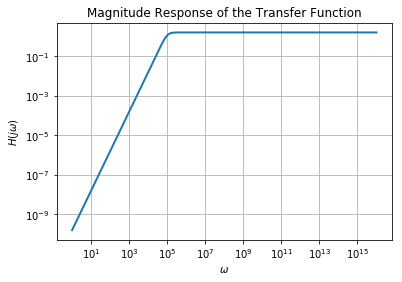

In [15]:
plt.loglog(w, np.abs(Vo),lw=2)
plt.xlabel("$\omega$")
plt.ylabel("$H(j\omega)$")
plt.grid(True)
plt.title("Magnitude Response of the Transfer Function")
plt.show()

# Obtaining the step response of the circuit
The unit response has some initial values which decreases to zero with a little overshoot.This is because the quality factor of the second order system is greater than $\frac{1}{\sqrt{2}}$. Also in a unit step all the frequency components are present at t=0.At this point the low frequency components are attenuates and the high frequency components are amplified. After some time the frequency component is zero thus output is zero.

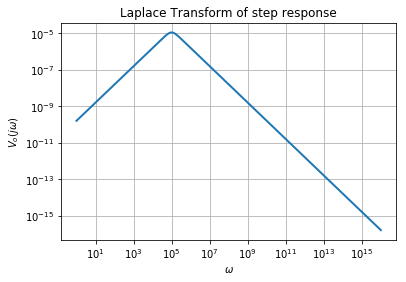

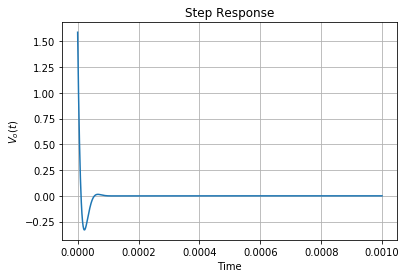

In [16]:
Vi_step = 1/s
step = np.heaviside(t, 1) # Step input #
time, step_response, svec = sp.lsim(H, step, t)
A, b, Vo = highpass(10000,10000,1e-9,1e-9,1.586,1000,Vi_step)
f = lambdify(s, Vo, 'numpy')
Vo = f(ss)


plt.loglog(w, np.abs(Vo), lw=2)
plt.xlabel("$\omega$")
plt.ylabel("$V_o(j\omega)$")
plt.grid(True)
plt.title("Laplace Transform of step response")
plt.show()


plt.plot(t, step_response)
plt.xlabel("Time")
plt.ylabel("$V_o(t)$")
plt.title("Step Response")
plt.grid(True)
plt.show()

# Decaying sinusoidal inputs to the high pass filter
From the graphs it is clearly evident that the filter is responding only to high frequency components.

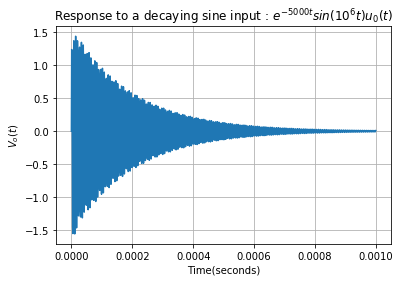

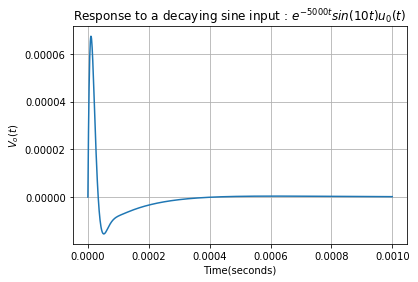

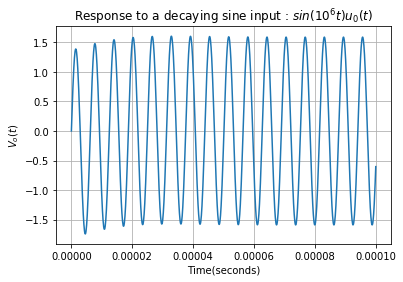

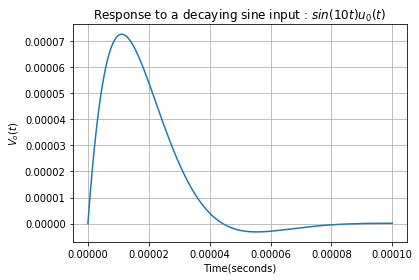

In [17]:
decay_sin_1=np.sin(1e6*t)*np.exp(-5000*t)*np.heaviside(t, 1) # Decaying sinusoid input #
decay_sin_2=np.sin(10*t)*np.exp(-5000*t)*np.heaviside(t, 1) 
t1=np.arange(0,1e-4,1e-7)
decay_sin_3=np.sin(1e6*t1)*np.heaviside(t1, 1)
t1=np.arange(0,1e-4,1e-7)
decay_sin_4=np.sin(10*t1)*np.heaviside(t1, 1)


time,sin_response_1,svec=sp.lsim(H,decay_sin_1,t) # Simulate the output using lsim #
time,sin_response_2,svec=sp.lsim(H,decay_sin_2,t) 
time1,sin_response_3,svec=sp.lsim(H,decay_sin_3,t1) 
time1,sin_response_4,svec=sp.lsim(H,decay_sin_4,t1) 

plt.plot(t, sin_response_1)
plt.xlabel("Time(seconds)")
plt.ylabel("$V_o(t)$")
plt.title("Response to a decaying sine input : $e^{-5000t}sin(10^6t)u_0(t)$")
plt.grid(True)
plt.show()

plt.plot(t, sin_response_2)
plt.xlabel("Time(seconds)")
plt.ylabel("$V_o(t)$")
plt.title("Response to a decaying sine input : $e^{-5000t}sin(10t)u_0(t)$")
plt.grid(True)
plt.show()

plt.plot(t1, sin_response_3)
plt.xlabel("Time(seconds)")
plt.ylabel("$V_o(t)$")
plt.title("Response to a decaying sine input : $sin(10^6t)u_0(t)$")
plt.grid(True)
plt.show()

plt.plot(t1, sin_response_4)
plt.xlabel("Time(seconds)")
plt.ylabel("$V_o(t)$")
plt.title("Response to a decaying sine input : $sin(10t)u_0(t)$")
plt.grid(True)
plt.show()


# Conclusions
Any linear electrical circuit can be simulated using the `sympy` and `scipy.signal` module.<br/>
Two types of circuits namely Highpass filter and Lowpass Filter were simulated in this assignment.